In [1]:
import numpy as np
import pandas as pd
import os
import re

# Data Prep for Model

In [2]:
state_level_df = pd.read_csv('data/cln/all_states_real_sir.csv')
state_level_df[['state','population']].drop_duplicates()
state_level_df = state_level_df[state_level_df['state'].isin(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT','NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY'])]

state_level_df['standardized_date'] = pd.to_datetime(state_level_df['standardized_date'])
start_date_df = state_level_df.groupby(['state'],as_index = False).agg({'standardized_date':'min'})
start_date_df.columns = ['state','start_date']

state_level_df = pd.merge(state_level_df,start_date_df)
# Starting point defined as the first day when there are 2 cases. 
state_level_df['day'] = state_level_df['standardized_date'] - state_level_df['start_date']
state_level_df['day'] = state_level_df['day'].apply(lambda x : x.days)
state_level_df[state_level_df['day'] == 0]

,state,standardized_date,# Infected,# Deaths,total_number_of_days,population,# Susceptible,start_date,day
0,AK,2020-03-19,10.0,1.0,25,710231,710221.0,2020-03-19,0
26,AL,2020-03-14,11.0,0.0,30,4779736,4779725.0,2020-03-14,0
57,AR,2020-03-14,12.0,0.0,30,2915918,2915906.0,2020-03-14,0
88,AZ,2020-03-11,10.0,0.0,33,6392017,6392007.0,2020-03-11,0
122,CA,2020-02-21,10.0,0.0,52,37253956,37253946.0,2020-02-21,0
175,CO,2020-03-09,14.0,0.0,35,5029196,5029182.0,2020-03-09,0
211,CT,2020-03-14,20.0,0.0,30,3574097,3574077.0,2020-03-14,0
242,DC,2020-03-11,10.0,0.0,33,601723,601713.0,2020-03-11,0
276,DE,2020-03-17,17.0,0.0,27,897934,897917.0,2020-03-17,0
304,FL,2020-03-09,14.0,2.0,35,18801310,18801296.0,2020-03-09,0


In [3]:
state_level_df.columns=['Region name', 'date','# Infected','# Removed', 'total_number_of_days', 
                        'population','# Susceptible','start_date','day']
test_data = state_level_df[['Region name', 'date','# Infected','# Removed','# Susceptible','day']].copy()

test_data.head(3)

,Region name,date,# Infected,# Removed,# Susceptible,day
0,AK,2020-03-19,10.0,1.0,710221.0,0
1,AK,2020-03-20,16.0,4.0,710215.0,1
2,AK,2020-03-21,20.0,6.0,710211.0,2


In [4]:
test_data.tail(3)

,Region name,date,# Infected,# Removed,# Susceptible,day
1147,NY,2020-04-11,180533.0,8627.0,19197569.0,38
1148,NY,2020-04-12,188694.0,9385.0,19189408.0,39
1149,NY,2020-04-13,195031.0,9767.0,19183071.0,40


In [5]:
# how many days of data we have 
total_day_state = state_level_df[['Region name', 'total_number_of_days']].drop_duplicates()
total_day_state

,Region name,total_number_of_days
0,AK,25
26,AL,30
57,AR,30
88,AZ,33
122,CA,52
175,CO,35
211,CT,30
242,DC,33
276,DE,27
304,FL,35


# Model Starts here


In [6]:
from src.eval_model import *
from src.SIR import sir, dynamic_sim_sir, dynamic_sim_sir_df

In [ ]:
def sir_stroud(
    s: float, i: float, r: float,
    beta: float, nu: float, gamma: float, n: float,
) -> Tuple[float, float, float]:
    """The SIR stroud model, one time step."""
    s_n = (-beta) * (s/n)**nu * i + s
    i_n = (beta * (s/n)**nu * i  - gamma * i) + i
    r_n = gamma * i + r
    scale = n / (s_n + i_n + r_n)
    return s_n * scale, i_n * scale, r_n * scale

# SIR: Find best $I_0$, beta, gamma 

- Optimize the SIR model first
- Using the first 15 day's of data, rest days will be used for evaluation
- Allow inital infected number of be adjust up

In [7]:
# specify range

I_adjust_range = [1]# I0 = I * I_range_adjust
beta_range = np.arange(0.5e-8, 5e-7, 3e-9)
beta_decay = [0.005,0.0075, 0.01, 0.025, 0.05,0.075,0.1,0.125, 0.15]
beta_decay_start_day = [5,10,15,20]
gamma_range = [1/x for x in range(8, 24, 4)]


def print_range(txt, x):
    print(txt + ' : ' + str(min(x)) + ' - ' + str(max(x)) + ' (' + str(len(x)) + ')')

print_range('# Infected Adjustment', I_adjust_range)
print_range('beta', beta_range)
print_range('beta_decay', beta_decay)
print_range('beta_decay_start_day', beta_decay_start_day)
print_range('gamma', gamma_range)
print_range('1/gamma', [1/x for x in gamma_range])

# Infected Adjustment : 1 - 1 (1)
beta : 5e-09 - 4.970000000000001e-07 (165)
beta_decay : 0.005 - 0.15 (9)
beta_decay_start_day : 5 - 20 (4)
gamma : 0.05 - 0.125 (4)
1/gamma : 8.0 - 20.0 (4)


In [8]:
I_adjust_range_v, beta_range_v, beta_decay_v, beta_decay_start_day_v, gamma_v = np.meshgrid(
    I_adjust_range,\
    beta_range, \
    beta_decay,\
    beta_decay_start_day,\
    gamma_range,\
    sparse = False)

Grid = pd.DataFrame({
    'I_adjust':I_adjust_range_v.flatten(),
    'beta': beta_range_v.flatten(),
    'beta_decay': beta_decay_v.flatten(),
    'beta_decay_start_day': beta_decay_start_day_v.flatten(),
    'gamma':gamma_v.flatten()
})

In [9]:
Grid.shape

(23760, 5)

In [10]:
# get the day 0's number

DAY_0 = test_data[test_data['day'] == 0].copy()

DAY_0['N'] = DAY_0['# Infected'] + DAY_0['# Susceptible'] + DAY_0['# Removed']

DAY_0

,Region name,date,# Infected,# Removed,# Susceptible,day,N
0,AK,2020-03-19,10.0,1.0,710221.0,0,710232.0
26,AL,2020-03-14,11.0,0.0,4779725.0,0,4779736.0
57,AR,2020-03-14,12.0,0.0,2915906.0,0,2915918.0
88,AZ,2020-03-11,10.0,0.0,6392007.0,0,6392017.0
122,CA,2020-02-21,10.0,0.0,37253946.0,0,37253956.0
175,CO,2020-03-09,14.0,0.0,5029182.0,0,5029196.0
211,CT,2020-03-14,20.0,0.0,3574077.0,0,3574097.0
242,DC,2020-03-11,10.0,0.0,601713.0,0,601723.0
276,DE,2020-03-17,17.0,0.0,897917.0,0,897934.0
304,FL,2020-03-09,14.0,2.0,18801296.0,0,18801312.0


In [11]:
def get_vetcor_beta(p_original_beta,p_decay, p_start_day, p_total_day):
    p_start_day=int(p_start_day)
    p_total_day= int(p_total_day)
    new_beta_v=[]
    if p_start_day>p_total_day:
        return [p_original_beta]*p_total_day
    else:
        for day in range(p_start_day):
            new_beta_v.append(p_original_beta)
        for day in range(p_start_day,p_total_day):
            new_beta_v.append(new_beta_v[-1]*(1-p_decay))
        return new_beta_v
        

In [12]:
# grid search for each region

region_var = 'Region name'
n_days_eval = 0 # carve out 5 days for back test

for region in test_data[region_var].unique():
    
    print(region)
    
    simulation_results = pd.DataFrame()
    
    for index, row in Grid.iterrows():
    
        # use part of days to do grid search
        n_days = total_day_state.loc[total_day_state[region_var] == region, 
                                 'total_number_of_days'].tolist()[0] - n_days_eval
        
        # Get parameter from Grid
        i_adjust = row['I_adjust']
        gamma = row['gamma']
        beta_vec = get_vetcor_beta(row['beta'], row['beta_decay'], row['beta_decay_start_day'],n_days)

        # fixed
        N =  DAY_0.loc[DAY_0[region_var] == region,'N'].tolist()[0]
        R =  DAY_0.loc[DAY_0[region_var] == region,'# Removed'].tolist()[0]

        # adjust I
        I =  int(DAY_0.loc[DAY_0[region_var] == region,'# Infected'].tolist()[0] * i_adjust)

        # back calculcate S
        S = N - I - R

        report = dynamic_sim_sir_df(S, I, R, gamma, 0, beta_vec, n_days)
        report[region_var] = region

        # include parameter setting
        report['beta'] = row['beta']
        report['beta_decay'] = row['beta_decay']
        report['beta_decay_start_day'] = row['beta_decay_start_day']
        report['gamma'] = gamma
        report['I0'] = I

        # append
        simulation_results = simulation_results.append(report)
    
    simulation_results = pd.merge(simulation_results, test_data, on = [region_var, 'day'])
    
    print(simulation_results.shape)

    simulation_results.to_csv('result/sir_decay_states_part1/grid/' + region + '.csv', index = False)


AK
(617760, 14)
AL
(736560, 14)
AR
(736560, 14)
AZ
(807840, 14)
CA
(1259280, 14)
CO
(855360, 14)
CT
(736560, 14)
DC
(807840, 14)
DE
(665280, 14)
FL
(855360, 14)
GA
(855360, 14)
HI
(665280, 14)
IA
(831600, 14)
ID
(641520, 14)
IL
(855360, 14)
IN
(831600, 14)
KS
(689040, 14)
KY
(784080, 14)
LA
(807840, 14)
MA
(879120, 14)
MD
(807840, 14)
ME
(689040, 14)
MI
(784080, 14)
MN
(784080, 14)
MO
(641520, 14)
MS
(736560, 14)
MT
(641520, 14)
NC
(807840, 14)
ND
(617760, 14)
NE
(807840, 14)
NH
(712800, 14)
NJ
(855360, 14)
NM
(760320, 14)
NV
(784080, 14)
NY
(974160, 14)


In [13]:
best_param = pd.DataFrame()
grid_path = 'result/sir_decay_states_part1/grid/'

for path in os.listdir(grid_path):
    
    if re.findall(".csv", path):
    
        region = re.sub(".csv", "", path)
    
        data = pd.read_csv(grid_path + path)
    
        data = data.groupby(['beta', 'beta_decay','beta_decay_start_day','gamma', 'I0']).\
        apply(lambda x: gen_Metrics(x, 'infected', '# Infected')).\
        reset_index().\
        drop('level_5', axis = 1)
    
        tmp = data.loc[data['SSE'].idxmin()].copy() ## min
    
        tmp[region_var] = region
    
        best_param = best_param.append(tmp)

best_param.to_excel(grid_path + '_best_param.xlsx', index = False)

In [14]:
best_param
# 3-30

,I0,Region name,SAE,SAPE,SSE,SSPE,beta,beta_decay,beta_decay_start_day,gamma
3088,12.0,MN,1172.612616,3.315206,8.009943e+04,0.546250,6.800000e-08,0.050,5.0,0.050000
2392,10.0,AZ,1476.140019,9.302354,1.092472e+05,7.874300,5.300000e-08,0.075,15.0,0.050000
4674,11.0,AL,2204.329382,3.456942,3.022935e+05,0.644433,1.010000e-07,0.050,5.0,0.083333
1803,17.0,NC,2892.072300,4.512652,5.536220e+05,1.610175,4.100000e-08,0.050,15.0,0.125000
4258,22.0,MO,1919.593254,2.451406,2.491003e+05,0.449402,9.200000e-08,0.075,5.0,0.083333
6708,11.0,NV,1261.961096,2.392899,1.098155e+05,0.376144,1.430000e-07,0.075,10.0,0.050000
17632,19.0,ND,111.107032,1.620298,7.267328e+02,0.277936,3.710000e-07,0.050,5.0,0.050000
22112,10.0,AK,240.778577,2.789905,3.522720e+03,0.532348,4.640000e-07,0.075,5.0,0.050000
6256,20.0,CT,4298.760165,2.075451,1.359965e+06,0.252121,1.340000e-07,0.050,5.0,0.050000
2678,12.0,MI,8910.760118,4.773969,3.700004e+06,1.636350,5.900000e-08,0.075,10.0,0.083333


# Final Model

### SIR model

In [15]:
region_var = 'Region name'
n_days_fit = 30 
best_param_1 = pd.read_excel('result/sir_decay_states_part1/grid/_best_param.xlsx')
final_result = pd.DataFrame()

for region in DAY_0[region_var]:
    
    # fixed
    N =  DAY_0.loc[DAY_0[region_var] == region,'N'].tolist()[0]
    R =  DAY_0.loc[DAY_0[region_var] == region,'# Removed'].tolist()[0]
    
    # best SIR 
    I = best_param_1.loc[best_param_1[region_var] == region, 'I0'].tolist()[0]
    beta = best_param_1.loc[best_param_1[region_var] == region, 'beta'].tolist()[0]
    beta_decay = best_param_1.loc[best_param_1[region_var] == region, 'beta_decay'].tolist()[0]
    beta_decay_start_day = best_param_1.loc[best_param_1[region_var] == region, 'beta_decay_start_day'].tolist()[0]
    gamma = best_param_1.loc[best_param_1[region_var] == region, 'gamma'].tolist()[0]
                
    S = N - I - R
    
    # use all available days
    n_days = total_day_state.loc[total_day_state[region_var] == region, 
                                 'total_number_of_days'].tolist()[0]
    
    beta_vec = get_vetcor_beta(beta, beta_decay, beta_decay_start_day,n_days)
            
    report = dynamic_sim_sir_df(S, I, R, gamma, 0, beta_vec, n_days)
    report[region_var] = region
                
    # append
    report['day'] = report.index.astype(int)
    final_result = final_result.append(report)


final_result.to_excel('result/sir_decay_states_part1/final_sir_model.xlsx', index = False)

# Plot the curve

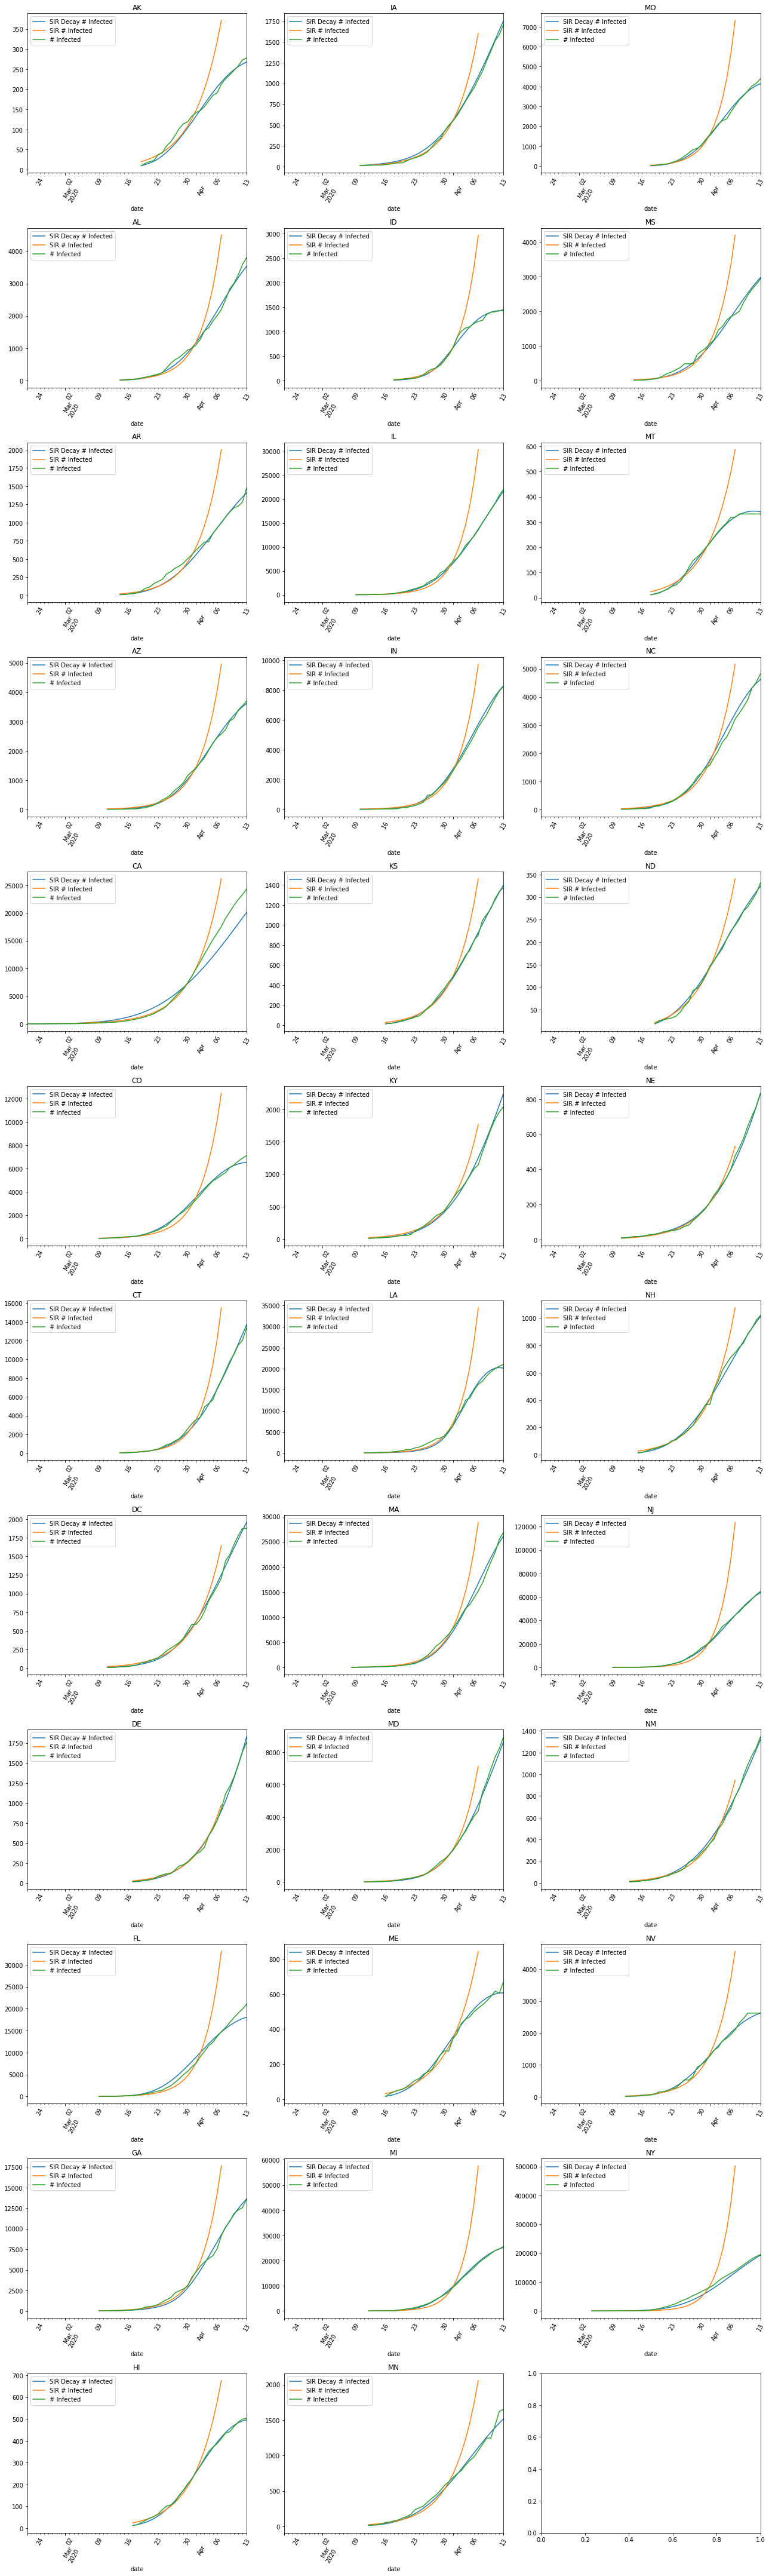

In [16]:
final_result_sir = pd.read_excel('result/sir/final_sir_model.xlsx')\
[['susceptible', 'infected', 'recovered', 'Region name', 'day']].\
rename(columns = {'susceptible':'SIR # Susceptible',
                 'infected':'SIR # Infected',
                 'recovered':'SIR # Removed'})

final_result_sir_decay = pd.read_excel('result/sir_decay_states_part1/final_sir_model.xlsx')\
[['susceptible', 'infected', 'recovered', 'Region name', 'day']].\
rename(columns = {'susceptible':'SIR Decay # Susceptible',
                 'infected':'SIR Decay # Infected',
                 'recovered':'SIR Decay # Removed'})

final = pd.merge(final_result_sir, final_result_sir_decay,how='outer')
final = pd.merge(final, test_data)

min_date = min(final['date'])
max_date = max(final['date'])

min_y = min(min(final.loc[final['Region name'].isin(['NY', 'MI']) == False, 'SIR Decay # Infected']),
            min(final.loc[final['Region name'].isin(['NY', 'MI']) == False, 'SIR # Infected']), 
            min(final.loc[final['Region name'].isin(['NY', 'MI']) == False, '# Infected']))

max_y = max(max(final.loc[final['Region name'].isin(['NY', 'MI']) == False, 'SIR Decay # Infected']), 
            max(final.loc[final['Region name'].isin(['NY', 'MI']) == False, 'SIR # Infected']), 
            max(final.loc[final['Region name'].isin(['NY', 'MI']) == False, '# Infected']))
nrow = 12
ncol = 3

x = np.arange(0, nrow, 1)
y = np.arange(0, ncol, 1)
xx, yy = np.meshgrid(x, y)    
num = 0 

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize = (ncol * 6, nrow * 5))

for region in final['Region name'].unique():
    
    
    region_data = final[final['Region name'] == region].copy()
    
    # find the last day for gridsearch
    end_day = total_day_state.loc[total_day_state['Region name'] == region, "total_number_of_days"].tolist()[0] - 5
   
    end_date = pd.to_datetime(region_data.loc[region_data['day'] == end_day, "date"].tolist()[0])
    
    # axis set up 
    x = xx.flatten()[num]
    y = yy.flatten()[num]
            
    # plot
    tmp = region_data[['date', 'SIR Decay # Infected', 'SIR # Infected', '# Infected']].copy()
    
    tmp['date'] = tmp['date'].apply(lambda x: pd.to_datetime(x))
    
    tmp = tmp.set_index('date')
    
    if region in ['NY', 'MI']:
        ax = tmp.plot(ax = axes[x, y], title = region, rot = 60, xlim = (min_date, max_date))
    else:
        ax = tmp.plot(ax = axes[x, y], title = region, rot = 60, xlim = (min_date, max_date))

    #ax.axvline(end_date, color="grey", linestyle="--")
    
    num += 1

plt.tight_layout()
plt.savefig('result/sir_decay_states_part1//final_fitted_sir_decay.png', dpi = 220)